# Homework 2

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

## About the Data Set For Q1-2
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras
- Any other library used during the lectures and discussion sessions.

## About the Data Set For Q3
In this problem, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.


### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.



## Exercise 1 : Building a Feed-Forward Neural Network(50 points in total)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.

### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 4-layer artificial neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a multi-class classification problem so select the right number of nodes accordingly for the output layer.

For training and testing the model, split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance.

Consider the following hyperparameters while developing your model :

- Number of nodes in each hidden layer should be (12, 3)
- Learning rate should be 0.3
- Number of epochs should be 500
- The sigmoid function should be used as the activation function in each layer
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

# Load dataset
dataset = pd.read_csv("Dry_Beans_Dataset.csv")

# Pre-process the data
X = dataset.drop('Class', axis = 1)
# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
y = dataset["Class"]
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'Class': set_of_classes})
y = pd.get_dummies(y)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_rescaled, columns=X.columns)

# One-hot encoding for the categorical classes
y = pd.get_dummies(y)

# Splitting data into ratio 90:10
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model
mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic', learning_rate_init=0.3,
                    batch_size=100, hidden_layer_sizes=(12, 3), max_iter=500)
mlp.fit(data_train, class_train)

# Make predictions
pred = mlp.predict(data_test)

# Calculate metrics
print("Accuracy:", accuracy_score(class_test, pred))
print("Mean Square Error:", mean_squared_error(class_test, pred))
print("Confusion Matrix for each label:")
print(multilabel_confusion_matrix(class_test, pred))
print("Classification Report:")
print(classification_report(class_test, pred))


Accuracy: 0.8964757709251101
Mean Square Error: 0.0250681770505559
Confusion Matrix for each label:
[[[1208   17]
  [   8  129]]

 [[1299    0]
  [   0   63]]

 [[1156   11]
  [  17  178]]

 [[ 990   30]
  [  38  304]]

 [[1165   16]
  [   8  173]]

 [[1155    7]
  [  12  188]]

 [[1091   27]
  [  48  196]]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       137
           1       1.00      1.00      1.00        63
           2       0.94      0.91      0.93       195
           3       0.91      0.89      0.90       342
           4       0.92      0.96      0.94       181
           5       0.96      0.94      0.95       200
           6       0.88      0.80      0.84       244

   micro avg       0.92      0.90      0.91      1362
   macro avg       0.93      0.92      0.92      1362
weighted avg       0.92      0.90      0.91      1362
 samples avg       0.90      0.90      0.90      1362



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Exercise 2 : k-fold Cross Validation (10 points in total)

In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.

__Requirements :__
- The accuracy and MSE values during each iteration of the cross validation
- The overall average accuracy and MSE value

__Note :__ The mean squared error (MSE) values obtained should be positive.

In [26]:
mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic', learning_rate_init=0.4, batch_size=100, hidden_layer_sizes=(10, 2), max_iter=600)
CV = cross_validate(mlp, X, y, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])

print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])
print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

n_splits = 10
kf = KFold(n_splits=n_splits)

acc = 0
mse = 0

i = 0
for train_indices, test_indices in kf.split(X):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1

    mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic', learning_rate_init=0.4, batch_size=100, hidden_layer_sizes=(10, 2), max_iter=600)
    mlp.fit(X[start_train:stop_train], y[start_train:stop_train])
    pred = mlp.predict(X[start_test:stop_test])

    i += 1
    acc += accuracy_score(y[start_test:stop_test], pred)
    mse += mean_squared_error(y[start_test:stop_test], pred)

    print("\nAccuracy for batch ", i, " : ", accuracy_score(y[start_test:stop_test], pred))
    print("Mean Square Error for batch ", i, " : ", mean_squared_error(y[start_test:stop_test], pred))

print('\nAverage Accuracy = ', acc / n_splits)
print('Average MSE = ', mse / n_splits)

Accuracy
[0.84140969 0.83908891 0.70977223 0.65393093 0.8104335  0.79720794
 0.82218957 0.67597355 0.80382072 0.62968406]
MSE
[0.02947346 0.03264406 0.05048809 0.05951506 0.0361079  0.03726252
 0.03547811 0.0552115  0.0399916  0.06161436]
Average Accuracy =  0.7583511087662285
Average MSE =  0.04377866784671188

Accuracy for batch  1  :  0.8414096916299559
Mean Square Error for batch  1  :  0.02947346339416824

Accuracy for batch  2  :  0.7641440117560617
Mean Square Error for batch  2  :  0.046079563346278996

Accuracy for batch  3  :  0.769287288758266
Mean Square Error for batch  3  :  0.043875301773905744

Accuracy for batch  4  :  0.7509184423218221
Mean Square Error for batch  4  :  0.04775900073475386

Accuracy for batch  5  :  0.7700220426157237
Mean Square Error for batch  5  :  0.04408523144746509

Accuracy for batch  6  :  0.745775165319618
Mean Square Error for batch  6  :  0.04786396557153353

Accuracy for batch  7  :  0.7641440117560617
Mean Square Error for batch  7  :  

## Exercise 3 - Logistic Regression (20 points in total)
Recall the dataset from last week homework

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('auto-mpg.csv')

data = df.copy().loc[(df['origin'] != 'Europe'), :]

train, test = train_test_split(data, test_size=0.2, random_state=21)

X_train, y_train = train.drop(columns=['origin']), train['origin']
X_test, y_test = test.drop(columns=['origin']), test['origin']


### Exercise 3.2 - Logistic Regression (15 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

cls = LogisticRegression()
cls.fit(X_train, y_train)

print(classification_report(y_test, cls.predict(X_test)))

y_pred = cls.predict(X_test)

precision_usa = precision_score(y_test, y_pred, pos_label='USA')
precision_japan = precision_score(y_test, y_pred, pos_label='Japan')
print("Testing Precision for USA: ", precision_usa)
print("Testing Precision for Japan: ", precision_japan)

recall_usa = recall_score(y_test, y_pred, pos_label='USA')
recall_japan = recall_score(y_test, y_pred, pos_label='Japan')
print("Testing Recall for USA: ", recall_usa)
print("Testing Recall for Japan: ", recall_japan)

              precision    recall  f1-score   support

       Japan       0.81      0.62      0.70        21
         USA       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65

Testing Precision for USA:  0.8367346938775511
Testing Precision for Japan:  0.8125
Testing Recall for USA:  0.9318181818181818
Testing Recall for Japan:  0.6190476190476191


## Exercise 4 - Polynomial Regressor using Gradient Descent (20 points in total)
Now we are going to look into model fitting. In the dataset cost.csv, the first column is the independent variable production_output, and the second column is the dependent variable cost.

### Exercise 4.1 - Split the dataset (5 points)
Import the dataset cost.csv and split them into training and testing set with ratio 70:30.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('cost.csv')

X = data.iloc[:, 0:1].values  
y = data.iloc[:, 1].values    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Exercise 4.2 - Polynomial Regression (15 points)
Compute the RMSE and R2 for the training and testing set. Using polynomial regression with degree 1, 2, 3, and 4, which model provides the most appropriate prediction? Justify your answer and plot the models fitted line.

Degree 1
Training RMSE: 406.2036874706793, R2: 0.6013585090226832
Test RMSE: 372.78414087710786, R2: 0.6239611345518692


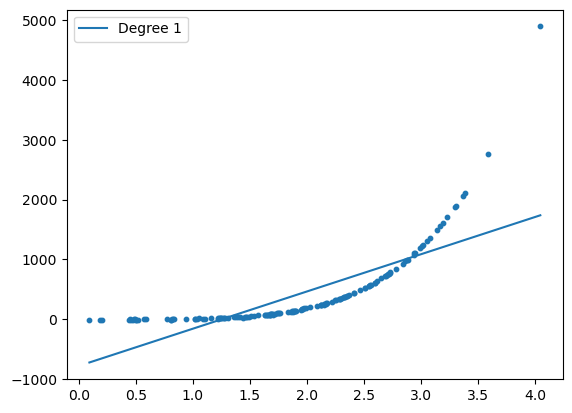

Degree 2
Training RMSE: 178.32810412214928, R2: 0.9231693760351608
Test RMSE: 124.82326683409799, R2: 0.9578391880017306


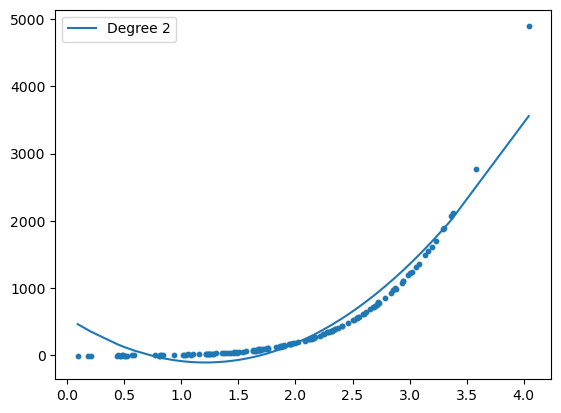

Degree 3
Training RMSE: 36.991969947927764, R2: 0.9966939478907739
Test RMSE: 35.13045171260478, R2: 0.9966604700286666


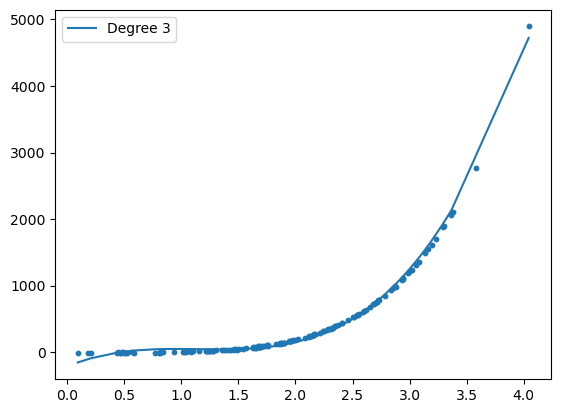

Degree 4
Training RMSE: 5.791590725167256, R2: 0.9999189616661643
Test RMSE: 6.709469840427994, R2: 0.9998781868181378


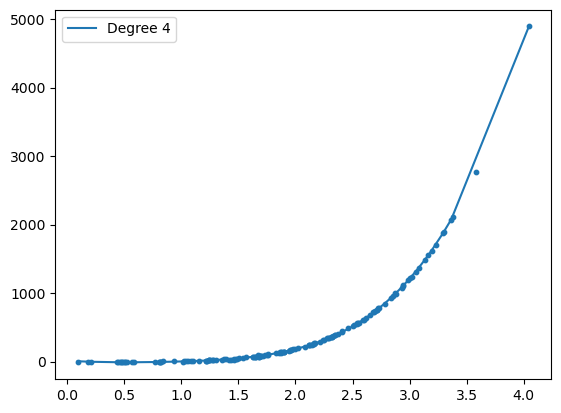

In [5]:
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

for degree in range(1, 5):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    print(f'Degree {degree}')
    print(f'Training RMSE: {rmse_train}, R2: {r2_train}')
    print(f'Test RMSE: {rmse_test}, R2: {r2_test}')

    plt.scatter(X, y, s=10)
    sorted_zip = sorted(zip(X_train, y_train_pred))
    X_train_sorted, y_train_pred_sorted = zip(*sorted_zip)
    plt.plot(X_train_sorted, y_train_pred_sorted, label=f'Degree {degree}')
    plt.legend()
    plt.show()


The degree 4 model has the highest R2 score and the lowest RMSE for both the training and testing sets, indicating that it's the best fit among the four models.